# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;">Thomas Hays</p>
# <p style="text-align: right;">THaysMSU</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

git clone https://github.com/THaysMSU/CMSE202-s25-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [1]:
# put your code here
import pandas as pd

diabdf = pd.read_csv("diabetes_prediction_dataset.csv")
print(diabdf.head())
print(diabdf.describe())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0

How many patients are in this dataset? What are features of the patients?

There seem to be 100,000 patients in the dataset as a whole, with gender, age, hypertension, heart disease, history of smoking, BMI, and levels of both HbA1c and blood glucose taken into account to determine diabetes.

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [2]:
# put your code here
for i in range(len(diabdf['gender'])):
    if(diabdf.loc[i, 'gender'] == "Female"):
        diabdf.loc[i, 'gender'] = 0
    else:
        diabdf.loc[i, 'gender'] = 1
    if(diabdf.loc[i, 'smoking_history'] == "never" or diabdf.loc[i, 'smoking_history'] == "not current"):
        diabdf.loc[i, 'smoking_history'] = 0
    elif(diabdf.loc[i, 'smoking_history'] == "former" or diabdf.loc[i, 'smoking_history'] == "No Info"):
        diabdf.loc[i, 'smoking_history'] = 1
    elif(diabdf.loc[i, 'smoking_history'] == "ever" or diabdf.loc[i, 'smoking_history'] == "current"):
        diabdf.loc[i, 'smoking_history'] = 2
    if(diabdf.loc[i, 'diabetes'] == 0):
        diabdf.loc[i, 'diabetes'] = -1
print(diabdf.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060      -0.830000  
std         1.070672            40.708136       0.557766  
min         3.500000            80.000000      -1.000000  
25%         4.800000           100.000000      -1.000000  
50%         5.800000           14

### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [3]:
# copy your perceptron class to his cell
import sklearn as sk
import statsmodels.api as sm
import numpy as np

class DIYPercep():

    def __init__ (self, data, labels, iters, learning_rate):        
        self.data = sm.add_constant(data)
        self.labels = labels
        self.weights = np.ones(len(self.data[0]))
        self.niter = iters
        self.lrate = learning_rate
        
    def predict(self, feature_set):
        predict = np.dot(feature_set, self.weights[1:]) + self.weights[0]
        if(predict > 0):
            return 1
        else:
            return -1
    
    def fit(self):
        for i in range(self.niter):
            for j in range(len(self.data)):
                for k in range(len(self.weights)):
                    if(k == 0):
                        self.weights[0] = self.weights[0] + self.lrate * (self.labels[j] - self.predict(self.data[j][1:len(self.data[0])]))
                    else:
                        self.weights[k] = self.weights[k] + (self.lrate * (self.labels[j] - self.predict(self.data[j][1:len(self.data[0])])) * self.data[j][k])
        # for all iterations
        #    for each row in the data
        #        find the update value, changes the weights (including bias weight)
        
    def iterate(self, ntimes):
        for i in range(ntimes):
            for j in range(len(self.data)):
                for k in range(len(self.weights)):
                    if(k == 0):
                        self.weights[0] = self.weights[0] + self.lrate * (self.labels[j] - self.predict(self.data[j][1:len(self.data[0])]))
                    else:
                        self.weights[k] = self.weights[k] + (self.lrate * (self.labels[j] - self.predict(self.data[j][1:len(self.data[0])])) * self.data[j][k])

    def errors(self):
        errors = 0
        for i in range(len(self.data)):
            if(self.labels[i] - self.predict(self.data[i][1:len(self.data[0])]) != 0):
                errors += 1
        print(errors)

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [4]:
# put your code here
from sklearn.model_selection import train_test_split

x = diabdf.drop('diabetes', axis=1)
y = diabdf['diabetes']

train_vectors, test_vectors, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, train_size = 0.7, stratify=y)
train_dat = train_vectors.to_numpy()
test_dat = test_vectors.to_numpy()
train_lab = train_labels.to_numpy()
test_lab = test_labels.to_numpy()

print("Training Perceptron")

p = DIYPercep(train_dat, train_lab, 30, 0.01)
p.fit()
print("Errors (out of 70,000 points):")
p.errors()

Training Perceptron
Errors (out of 70,000 points):
5950


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [5]:
# put your code here
errors = 0
test_dat = sm.add_constant(test_dat)
for i in range(len(test_dat)):
    if(test_lab[i] - p.predict(test_dat[i][1:len(test_dat[i])]) != 0):
        errors += 1
print("Percent Correct:")
print((float(len(test_dat))-errors)/len(test_dat))

Percent Correct:
0.915


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [6]:
# put your code here
iters = 30
for i in range(20):
    iters += 1
    p.iterate(1)
    errors = 0
    for i in range(len(test_dat)):
        if(test_lab[i] - p.predict(test_dat[i][1:len(test_dat[i])]) != 0):
            errors += 1
    print("Percent Correct for " + str(iters) + " iterations:")
    print((float(len(test_dat))-errors)/len(test_dat))

Percent Correct for 31 iterations:
0.9468
Percent Correct for 32 iterations:
0.9355
Percent Correct for 33 iterations:
0.9482666666666667
Percent Correct for 34 iterations:
0.9489
Percent Correct for 35 iterations:
0.9428333333333333
Percent Correct for 36 iterations:
0.9296666666666666
Percent Correct for 37 iterations:
0.9154333333333333
Percent Correct for 38 iterations:
0.915
Percent Correct for 39 iterations:
0.9152
Percent Correct for 40 iterations:
0.9461333333333334
Percent Correct for 41 iterations:
0.915
Percent Correct for 42 iterations:
0.9510666666666666
Percent Correct for 43 iterations:
0.9437333333333333
Percent Correct for 44 iterations:
0.9422333333333334
Percent Correct for 45 iterations:
0.9332666666666667
Percent Correct for 46 iterations:
0.9529333333333333
Percent Correct for 47 iterations:
0.9150666666666667
Percent Correct for 48 iterations:
0.915
Percent Correct for 49 iterations:
0.926
Percent Correct for 50 iterations:
0.9341666666666667


In [7]:
lrate = 0.00
for i in range(5):
    lrate += 0.01
    p = DIYPercep(train_dat, train_lab, 45, 0.01+(i/100))
    p.fit()
    errors = 0
    for i in range(len(test_dat)):
        if(test_lab[i] - p.predict(test_dat[i][1:len(test_dat[i])]) != 0):
            errors += 1
    print("Percent Correct for learning rate " + str(lrate) + ":")
    print((float(len(test_dat))-errors)/len(test_dat))

Percent Correct for learning rate 0.01:
0.9332666666666667
Percent Correct for learning rate 0.02:
0.9427666666666666
Percent Correct for learning rate 0.03:
0.915
Percent Correct for learning rate 0.04:
0.9433
Percent Correct for learning rate 0.05:
0.9176


As can be seen above, the ideal number of iterations seems to be 45, with approximately 95.1% accuracy - meanwhile, applying this optimal number of iterations to a similar test of learning rate gives us an optimal learning rate of 0.03, associated with a 95.22% accuracy.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [8]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
teldf = pd.read_csv("Telecust1.csv")
for i in range(len(teldf['custcat'])):
    if(teldf.loc[i, 'custcat'] == "A"):
        teldf.loc[i, 'custcat'] = 0
    elif(teldf.loc[i, 'custcat'] == "B"):
        teldf.loc[i, 'custcat'] = 1
    elif(teldf.loc[i, 'custcat'] == "C"):
        teldf.loc[i, 'custcat'] = 2
    elif(teldf.loc[i, 'custcat'] == "D"):
        teldf.loc[i, 'custcat'] = 3
    else:
        teldf.loc[i, 'custcat'] = 4
teldf = teldf.astype("float")
print(teldf.describe())

          region       tenure          age       income      marital  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000    77.535000     0.495000   
std       0.8162    21.359812    12.558816   107.044165     0.500225   
min       1.0000     1.000000    18.000000     9.000000     0.000000   
25%       1.0000    17.000000    32.000000    29.000000     0.000000   
50%       2.0000    34.000000    40.000000    47.000000     0.000000   
75%       3.0000    54.000000    51.000000    83.000000     1.000000   
max       3.0000    72.000000    77.000000  1668.000000     1.000000   

           address           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     11.551000     2.671000    10.987000     0.047000     0.517000   
std      10.086681     1.222397    10.082087     0.211745     0.499961   
min       0.000000     1.000000     0.000000     0.0000

---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [9]:
# put your modified perceptron class here
class ModDIYPercep():

    def __init__ (self, data, labels, iters, learning_rate):        
        self.data = sm.add_constant(data)
        self.labels = labels
        self.weights = np.ones(len(self.data[0]))
        self.niter = iters
        self.lrate = learning_rate
        
    def score(self, feature_set):
        return np.dot(feature_set, self.weights[1:]) + self.weights[0]
    
    def fit(self):
        for i in range(self.niter):
            for j in range(len(self.data)):
                for k in range(len(self.weights)):
                    if(k == 0):
                        self.weights[0] = self.weights[0] + self.lrate * (self.labels[j] - self.score(self.data[j][1:len(self.data[0])]))
                    else:
                        self.weights[k] = self.weights[k] + (self.lrate * (self.labels[j] - self.score(self.data[j][1:len(self.data[0])])) * self.data[j][k])
        
    def iterate(self, ntimes):
        for i in range(ntimes):
            for j in range(len(self.data)):
                for k in range(len(self.weights)):
                    if(k == 0):
                        self.weights[0] = self.weights[0] + self.lrate * (self.labels[j] - self.score(self.data[j][1:len(self.data[0])]))
                    else:
                        self.weights[k] = self.weights[k] + (self.lrate * (self.labels[j] - self.score(self.data[j][1:len(self.data[0])])) * self.data[j][k])

    def errors(self):
        err = 0
        for i in range(len(self.data)):
            if self.score(self.data[i][1:len(self.data[0])]) > 0:
                predicted = 1
            else:
                predicted = -1
            if self.labels[i] != predicted:
                err += 1
        return err

* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [10]:
# put your code here
x = teldf.drop('custcat', axis=1)
y = teldf['custcat']
train_vectors, test_vectors, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, train_size = 0.7, stratify=y)
train_dat = train_vectors.to_numpy()
test_dat = test_vectors.to_numpy()
train_lab = train_labels.to_numpy()
test_lab = test_labels.to_numpy()
train_a_lab = -1 * (np.ones(len(train_lab)))
train_b_lab = -1 * (np.ones(len(train_lab)))
train_c_lab = -1 * (np.ones(len(train_lab)))
train_d_lab = -1 * (np.ones(len(train_lab)))
train_e_lab = -1 * (np.ones(len(train_lab)))
for i in range(len(train_lab)):
    if(train_lab[i] == 0):
        train_a_lab[i] = 1
    elif(train_lab[i] == 1):
        train_b_lab[i] = 1
    elif(train_lab[i] == 2):
        train_c_lab[i] = 1
    elif(train_lab[i] == 3):
        train_d_lab[i] = 1
    elif(train_lab[i] == 4):
        train_e_lab[i] = 1

test_a_lab = -1 * (np.ones(len(test_lab)))
test_b_lab = -1 * (np.ones(len(test_lab)))
test_c_lab = -1 * (np.ones(len(test_lab)))
test_d_lab = -1 * (np.ones(len(test_lab)))
test_e_lab = -1 * (np.ones(len(test_lab)))
for i in range(len(test_lab)):
    if(test_lab[i] == 0):
        test_a_lab[i] = 1
    elif(test_lab[i] == 1):
        test_b_lab[i] = 1
    elif(test_lab[i] == 2):
        test_c_lab[i] = 1
    elif(test_lab[i] == 3):
        test_d_lab[i] = 1
    elif(test_lab[i] == 4):
        test_e_lab[i] = 1

* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [11]:
# put your code here
pa = ModDIYPercep(train_dat, train_a_lab, 100, 0.01)
pa.fit()
print("Errors:")
print(pa.errors())

pb = ModDIYPercep(train_dat, train_b_lab, 100, 0.01)
pb.fit()
print("Errors:")
print(pb.errors())

pc = ModDIYPercep(train_dat, train_c_lab, 100, 0.01)
pc.fit()
print("Errors:")
print(pc.errors())

pd = ModDIYPercep(train_dat, train_d_lab, 100, 0.01)
pd.fit()
print("Errors:")
print(pd.errors())

pe = ModDIYPercep(train_dat, train_e_lab, 100, 0.01)
pe.fit()
print("Errors:")
print(pe.errors())

Errors:
186
Errors:
152
Errors:
197
Errors:
165
Errors:
0


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [21]:
# put your code here
errors = 0
for i in range(len(test_dat)):
    prediction = 0.0
    ascore = pa.score(test_dat[i])
    bscore = pb.score(test_dat[i])
    cscore = pc.score(test_dat[i])
    dscore = pd.score(test_dat[i])
    escore = pe.score(test_dat[i])
    if(max(ascore, bscore, cscore, dscore, escore) == ascore):
        prediction = 0.0
    elif(max(ascore, bscore, cscore, dscore, escore) == bscore):
        prediction = 1.0
    elif(max(ascore, bscore, cscore, dscore, escore) == cscore):
        prediction = 2.0
    elif(max(ascore, bscore, cscore, dscore, escore) == dscore):
        prediction = 3.0
    else:
        prediction = 4.0
    if(prediction != test_lab[i]):
        errors += 1
print("Accuracy:")
print((float(len(test_lab))-errors)/len(test_lab))

Accuracy:
0.0


How good is your multiple-label perceptron classification?

It doesn't seem to be very accurate.


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [16]:
# put your code here.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
x = teldf.drop('custcat', axis=1)
y = teldf['custcat']
x = x.iloc[:][:200]
y = y.iloc[:200]
train_vectors, test_vectors, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, train_size = 0.7, stratify=y)
print("Fitting the classifier to the training set")
param_grid = {'C': [1e-2, 1e-1, 1e0, 1e1],
              'gamma': [1e-4, 0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}
clf = GridSearchCV(SVC(class_weight = 'balanced'), param_grid)
clf = clf.fit(train_vectors, train_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(class_weight='balanced', gamma=0.0001, kernel='linear')
Best parameters found by grid search:
{'C': 1.0, 'gamma': 0.0001, 'kernel': 'linear'}


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

              precision    recall  f1-score   support

         0.0       0.48      0.59      0.53        17
         1.0       0.33      0.50      0.40        14
         2.0       0.33      0.19      0.24        16
         3.0       0.44      0.31      0.36        13

    accuracy                           0.40        60
   macro avg       0.40      0.40      0.38        60
weighted avg       0.40      0.40      0.39        60



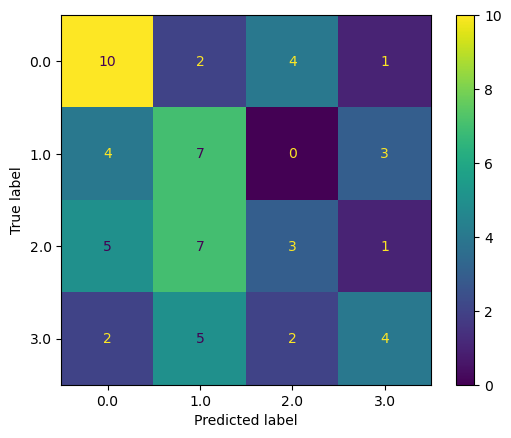

In [17]:
# put your code here
pred_labels = clf.predict(test_vectors)

print(classification_report(test_labels, pred_labels))
ConfusionMatrixDisplay.from_estimator(clf, test_vectors, test_labels);

Does SVM classifier work much better than your percetron?

The accuracy is significantly higher than that of my fundamental perceptron, at around 0.4.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




Text(0, 0.5, 'Time')

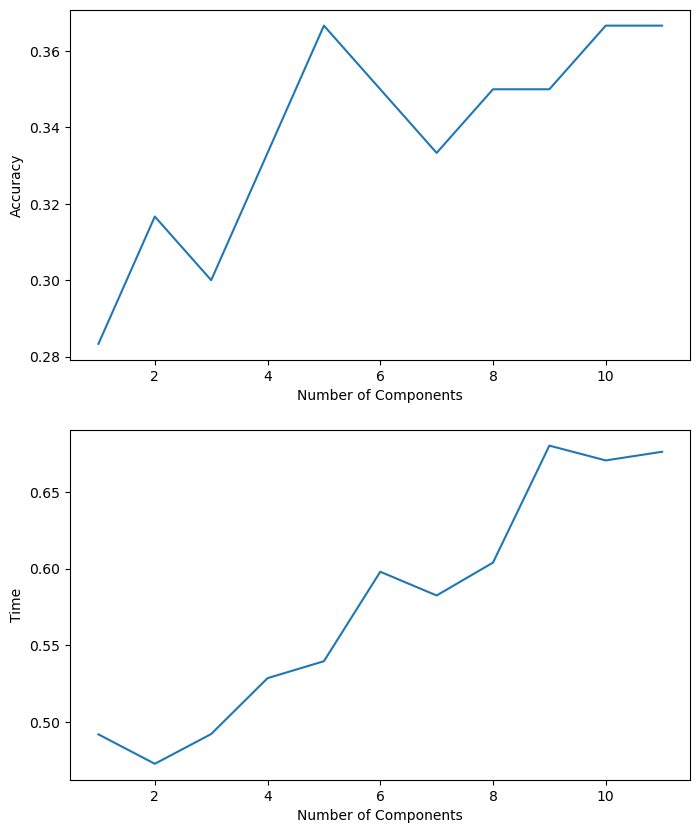

In [27]:
# put your code here
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

components = []
accuracy = []
t = []

for i in range(11):
    n_components = i+1
    components.append(n_components)
    
    #Set up the pca object with the number of compoents we want to find
    
    pca = PCA(n_components=n_components, whiten=True)
    
    #Fit the training data to the pca model.
    _ = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    
    start = time.time()
    param_grid = {'C': [1e-2, 1e-1, 1e0, 1e1],
                  'gamma': [1e-4, 0.001, 0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf']}
    clf = GridSearchCV(SVC(class_weight = 'balanced'), param_grid)
    clf = clf.fit(pca_train_vectors, train_labels)
    end = time.time()
    accuracy.append(clf.score(pca_test_vectors, test_labels))
    t.append(end - start)

fig = plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.plot(components, accuracy)
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.subplot(2, 1, 2)
plt.plot(components, t)
plt.xlabel("Number of Components")
plt.ylabel("Time")

Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

The overall performance is fairly good, but still not ideal, with a cap of approximately 0.36, lower than our original value of approximately 0.4. I suspect that a key element of this SVM classifier's failure to accurately represent its data is the nature of the data - with an inaccurate number of elements such as these, it's worth considering if the category is linked solely on the listed characteristics, or if there are other elements we have yet to consider.

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

As the number of components goes up, time and accuracy both tend to increase. This is because PCA's primary function is to map the elements of a dataset onto a series of axes, eliminating dimensions while at the same time also removing some of the variance in the data. Thus, since the data set is smaller, it runs faster, but at the same time, it represents the true structure of the data less. As the number of components go up, both accuracy and time increase because more dimensions are being added, which means less information is lost but at the same time the program must do more computations.

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University